<a href="https://colab.research.google.com/github/anaitipa/Decision_Tree/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/vertebrate(4).csv',header='infer')

In [ ]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [ ]:
# Replace values in the 'Class' column of the 'data' DataFrame
data['Class']= data['Class'].replace(['reptiles','fishes','amphibians','birds'],'non-mammals')

In [ ]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [ ]:
# Create a cross-tabulation (contingency table) of 'Class' against 'Warm-blooded' and 'Gives Birth' columns in 'data'
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [ ]:
from sklearn import tree

In [ ]:
y=data['Class']

In [ ]:
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [ ]:
# Create a new DataFrame 'X' by dropping the columns 'Name' and 'Class' from 'data'
X =data.drop(['Name','Class'], axis=1)

In [ ]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [ ]:
# Create a DecisionTreeClassifier instance with specified parameters
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf #initialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf=clf.fit(X,y)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
# Export the decision tree into Graphviz dot format and store it in 'dot_data'
dot_data=tree.export_graphviz(clf,feature_names=X.columns,class_names=['mammals','non-mammals'],filled=True,out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = non-mammals", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = mammals", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

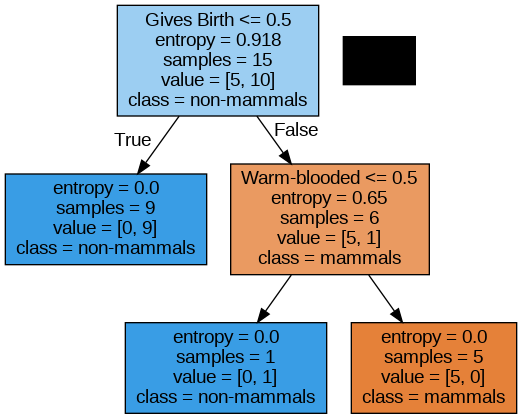

In [ ]:
graph

Image(graph.create_png())

In [ ]:
testData=[['gila monister',0,0,0,0,1,1,'non-mammals'],
          ['platypus',1,0,0,0,1,1,'mammals'],
          ['owl',1,0,0,1,1,0,'non-mammals'],
          ['dolphin',1,1,1,0,0,0,'mammals']]

In [ ]:
testData

[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mammals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [ ]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [ ]:
# Create a new DataFrame 'testData' from an existing object 'testData'
testData=pd.DataFrame(testData,columns=data.columns)

In [ ]:
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [ ]:
testY=testData['Class']

In [ ]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [ ]:
testX=testData.drop(['Name','Class'],axis=1)

In [ ]:
testX

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [ ]:
predY=clf.predict(testX)

In [ ]:
predY

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [ ]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [ ]:
3/4*100

75.0

In [ ]:
predictions=pd.concat([testData['Name'],testData['Class'],pd.Series(predY,name='Predicted Class')], axis=1)

In [ ]:
predictions

,Name,Class,Predicted Class
0,gila monister,non-mammals,non-mammals
1,platypus,mammals,non-mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


In [ ]:
3/4*100

75.0

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testY,predY) #***checks y

0.75

In [ ]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


In [ ]:
#Dtree dataset called animals --

EXERCISE 2:Creating a decision tree using Animals dataset
NB:TO SAVE ON GITHUB AND SHOULD HAVE ONE LINK

In [ ]:
import pandas as pd

In [ ]:
#Loading the dataset
data= pd.read_csv('/content/zoo animals.csv',header='infer')

In [ ]:
#Data in the dataset
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
5,python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
6,boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
7,adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
8,crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3
9,alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [ ]:
#Replace multiple values in the 'class_type' column with 'birds'
data['class_type']=data['class_type'].replace(['feathers','eggs','airborne','legs'],'birds')

In [ ]:
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
5,python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
6,boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
7,adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
8,crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3
9,alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [ ]:
#contingency table showing the distribution of class_type
pd.crosstab([data['airborne'],data['aquatic']],data['class_type'])

class_type        3  4  5  6  7
airborne aquatic               
0        0        8  0  0  5  3
         1        4  7  6  0  3
1        0        0  0  0  7  0

In [ ]:
from sklearn import tree

In [ ]:
# assigns the class_type column to the variable y
y=data['class_type']

In [ ]:
y

0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    5
20    5
21    5
22    5
23    5
24    5
25    6
26    6
27    6
28    6
29    6
30    6
31    6
32    6
33    6
34    6
35    6
36    6
37    7
38    7
39    7
40    7
41    7
42    7
Name: class_type, dtype: int64

In [ ]:
# Drop the columns 'animal_name' and 'class_type' from the DataFrame 'X'
X=data.drop(['animal_name','class_type'],axis=1)

In [ ]:
#value of x after the drop columns
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1
1,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0
2,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1
3,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
4,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0
5,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1
6,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
7,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1
8,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1
9,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1


In [ ]:
# Create an instance of the DecisionTreeClassifier
# 'criterion' is set to 'entropy' to use information gain for splitting the nodes
# 'max_depth' is set to 3 to limit the maximum depth of the tree to 3 levels
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf#initilized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Fit the DecisionTreeClassifier to the training data
clf=clf.fit(X,y)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Import the pydotplus library, which is used for creating and manipulating
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
# Define the class_type as [3, 4, 5, 6, 7]
class_type = [3, 4, 5, 6, 7]


In [ ]:
# Export the decision tree into Graphviz dot format and store it in 'dot_data'
# 'clf' is the trained decision tree classifier
dot_data=tree.export_graphviz(clf,feature_names=X.columns,class_names=[str(cls) for cls in class_type],filled=True,out_file=None)

In [ ]:
# Display the content of the 'dot_data' variable
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="backbone <= 0.5\\nentropy = 2.247\\nsamples = 43\\nvalue = [12, 7, 6, 12, 6]\\nclass = 3", fillcolor="#ffffff"] ;\n1 [label="legs <= 3.0\\nentropy = 0.918\\nsamples = 18\\nvalue = [0, 0, 0, 12, 6]\\nclass = 6", fillcolor="#9e9cf2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 5\\nvalue = [0, 0, 0, 0, 5]\\nclass = 7", fillcolor="#e539c0"] ;\n1 -> 2 ;\n3 [label="toothed <= 0.5\\nentropy = 0.391\\nsamples = 13\\nvalue = [0, 0, 0, 12, 1]\\nclass = 6", fillcolor="#4c49e7"] ;\n1 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 12\\nvalue = [0, 0, 0, 12, 0]\\nclass = 6", fillcolor="#3c39e5"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 0, 1]\\nclass = 7", fillcolor="#e539c0"] ;\n3 -> 5 ;\n6 [label="fins <= 0.5\\nentropy = 1.517\\nsamples = 25\\nvalue = [12, 7, 6, 0, 0]\\nclass = 3", fill

In [ ]:
# Create a graph from the 'dot_data' string using pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)

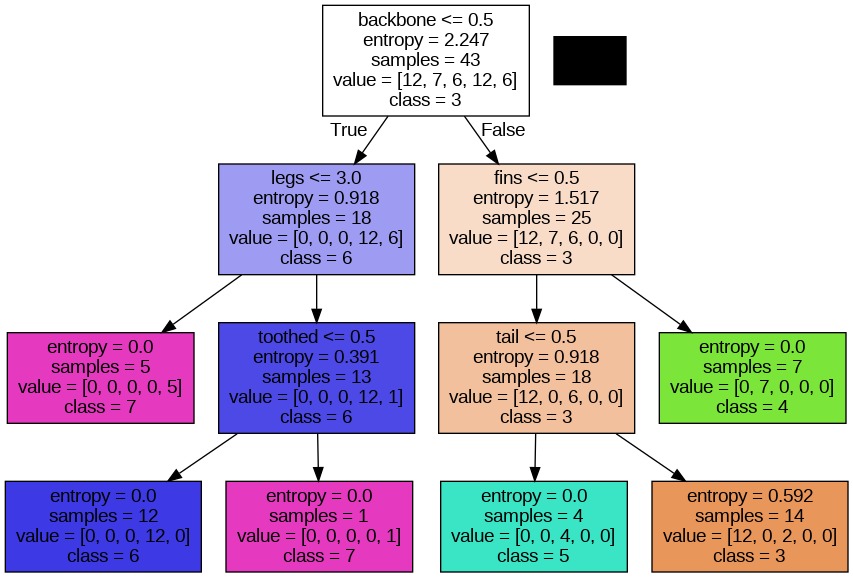

In [ ]:
graph
Image(graph.create_png())

In [ ]:
# Prepare your test data (excluding the first column which is a label)
testData = [
    ['turtle', 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 1, 1, 1, '3'],
    ['lizard', 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 0, '3']
]




In [ ]:
testData

[['turtle', 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 1, 1, 1, '3'],
 ['lizard', 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 0, '3']]

In [ ]:
data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [ ]:
# Create a DataFrame 'testData' using the data from the existing 'testData' object
testData=pd.DataFrame(testData,columns=data.columns)

In [ ]:
testData

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3


In [ ]:
# Extract the 'class_type' column from 'testData' DataFrame and assign it to 'testY'
testY=testData['class_type']

In [ ]:
testY

0    3
1    3
Name: class_type, dtype: object

In [ ]:
# Drop the columns 'animal_name' and 'class_type' from the 'testData' DataFrame
testX=testData.drop(['animal_name','class_type'],axis=1)

In [ ]:
testX

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1
1,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0


In [ ]:
# Use the trained decision tree classifier 'clf' to predict labels for 'testX'
predY=clf.predict(testX)

In [ ]:
predY

array([3, 3])

In [ ]:
testY

0    3
1    3
Name: class_type, dtype: object

In [ ]:
1/2*100

50.0

In [ ]:
# Create a DataFrame 'predictions' by concatenating columns from different sources
predictions=pd.concat([testData['animal_name'],testData['class_type'],pd.Series(predY,name='Predicteed Class')],axis=1)

In [ ]:
predictions

,animal_name,class_type,Predicteed Class
0,turtle,3,3
1,lizard,3,3


In [ ]:
1/2*100

50.0

In [ ]:
from sklearn .metrics import accuracy_score

In [ ]:
# Convert y_test to string to match y_pred's data type
y_test_str = testY.astype(str)

In [ ]:
# Assuming you have testY and predY from somewhere else
# Convert testY to integers to match predY's data type
testY_int = testY.astype(int)

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(testY_int, predY)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
# Display accuracy
print(f'Accuracy on test data is {accuracy:.2f}')

Accuracy on test data is 1.00


In [ ]:
print('Accuracy on test data is % .2f %(accuracy_core(testY,predY))')

Accuracy on test data is % .2f %(accuracy_core(testY,predY))
